In [1]:
import sys
sys.path.append("../..")


from experiments.plt_pab_fae import plt_fab_fae
from protocol.BB84EveTrainableProtocol import BB84EveTrainableProtocol
from protocol.BB84TrainableProtocol import BB84TrainableProtocol
from protocol.connection_elements.Layer import SeparableLayer, EntangledLayer
from protocol.BB84Protocol import BB84Protocol
from protocol.connection_elements.MultiQubitQCLEve import MultiQubitQCLEve


No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit/circuit/quantumcircuit.py:3428: RuntimeWarning: Cregbundle set to False since an instruction needs to refer to individual classical wire
  return circuit_drawer(


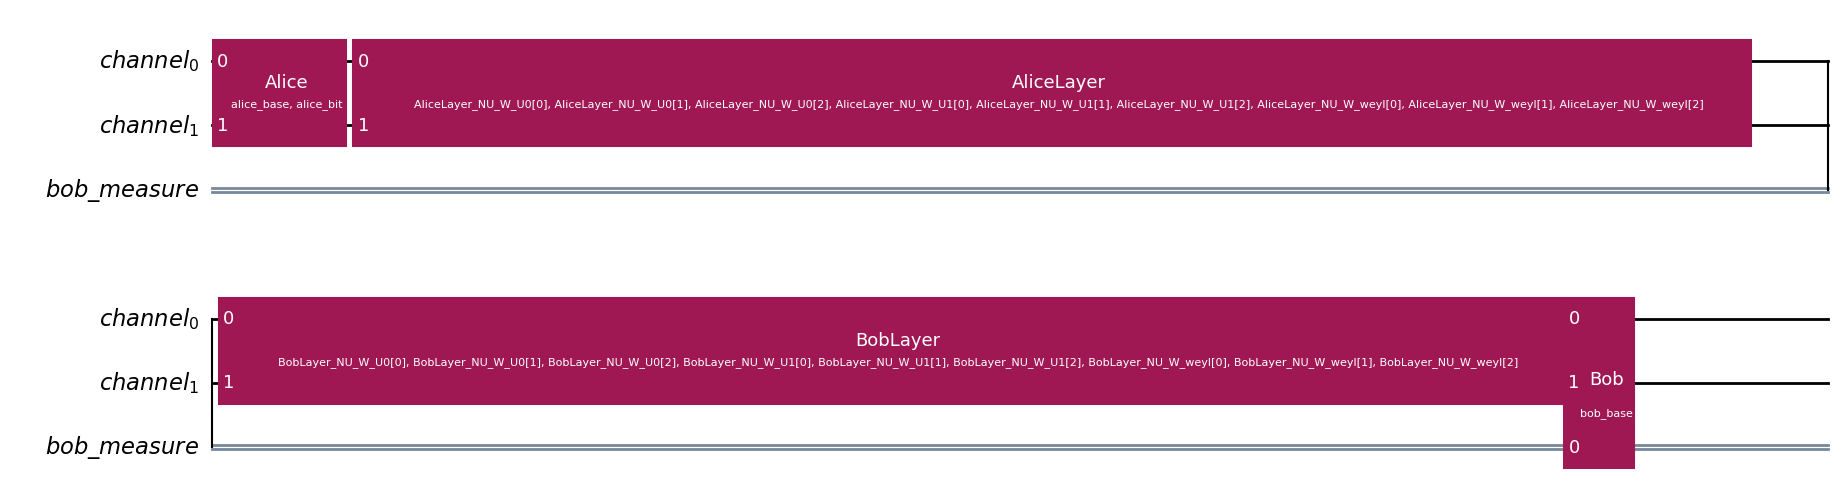

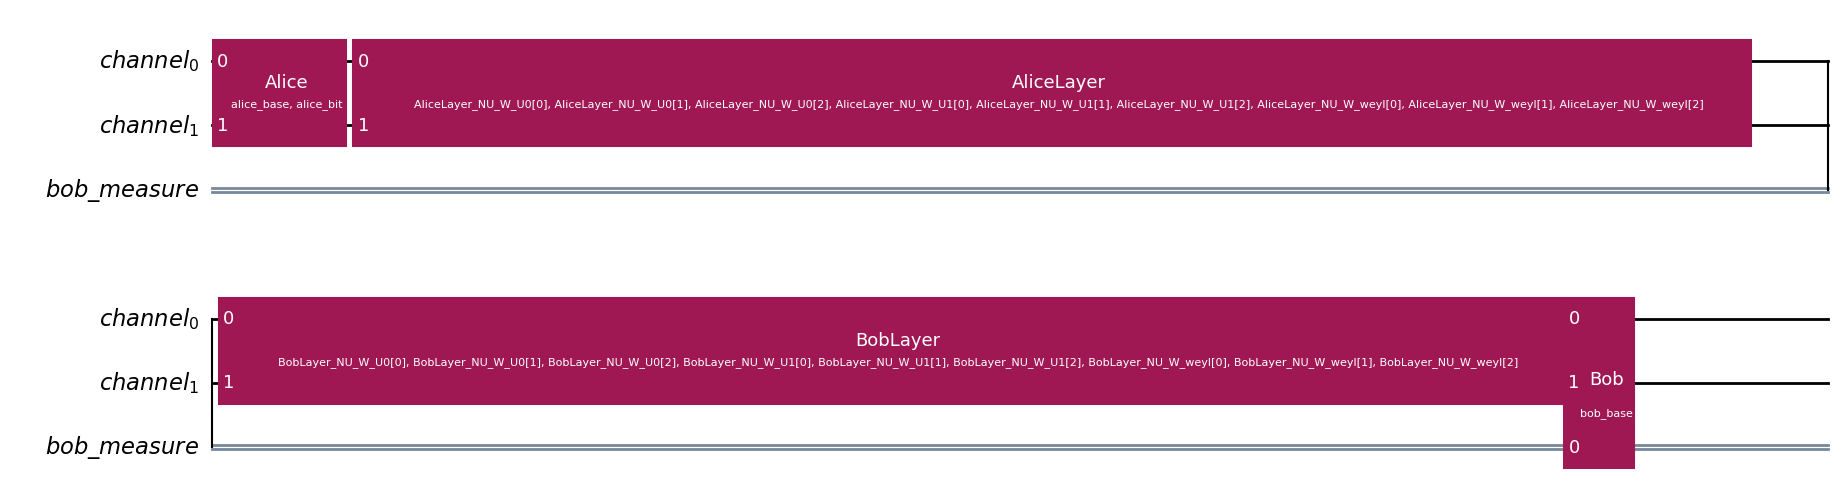

In [2]:
layers = [EntangledLayer("AliceLayer"), EntangledLayer("BobLayer")]
eve = MultiQubitQCLEve()

ab_protocol = BB84TrainableProtocol(n_bits=512, elements=layers, channel_size=2, seed=0, learning_rate=0.1)
eve_protocol = BB84EveTrainableProtocol(n_bits=512, elements=[layers[0], eve, layers[1]], channel_size=2,
                                        seed=0, alpha=1, learning_rate=0.1)

qc, _ = ab_protocol.qc_with_ctx()
qc.draw("mpl", expr_len=3)

In [3]:
def train_eve():
    bob_qber, eve_qber = [], []
    qber = eve_protocol.run()
    bob_qber.append(qber['bob_qber'])
    eve_qber.append(qber['eve_qber'])
    print(f'start QBER: {qber}')
    for epoch in range(50):
        loss = eve_protocol.train()
        qber = eve_protocol.run()
        bob_qber.append(qber['bob_qber'])
        eve_qber.append(qber['eve_qber'])
        if epoch % 5 == 0 or epoch == 49:
            print(f'epoch: {epoch}, loss: {loss}, QBER: {qber}')
    return bob_qber, eve_qber

def train_ab():
    bob_qber, eve_qber = [], []
    qber = ab_protocol.run()
    bob_qber.append(qber['bob_qber'])
    eve_qber.append(0.5)
    print(f'start QBER: {qber}')
    for epoch in range(20):
        loss = ab_protocol.train()
        qber = ab_protocol.run()
        bob_qber.append(qber['bob_qber'])
        eve_qber.append(0.5)
        if epoch % 5 == 0 or epoch == 19:
            print(f'epoch: {epoch}, loss: {loss}, QBER: {qber}')
    return bob_qber, eve_qber

# Krok 1 - trenowanie Alice i Boba do początkowego stanu
Uczymy Alice i Boba bez Eve, aby miały sensowne parametry początkowe i potrafiły przekazywać sobie dane.

In [4]:
b_q, e_q = train_ab()

start QBER: {'bob_qber': np.float64(0.0714285714285714)}
epoch: 0, loss: -0.9210880994796753, QBER: {'bob_qber': np.float64(0.03968253968253965)}
epoch: 5, loss: -0.9740652441978455, QBER: {'bob_qber': np.float64(0.011904761904761862)}
epoch: 10, loss: -0.9941345453262329, QBER: {'bob_qber': np.float64(0.003968253968253954)}
epoch: 15, loss: -0.9937475323677063, QBER: {'bob_qber': np.float64(0.003968253968253954)}
epoch: 19, loss: -0.9870057106018066, QBER: {'bob_qber': np.float64(0.011904761904761862)}


<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

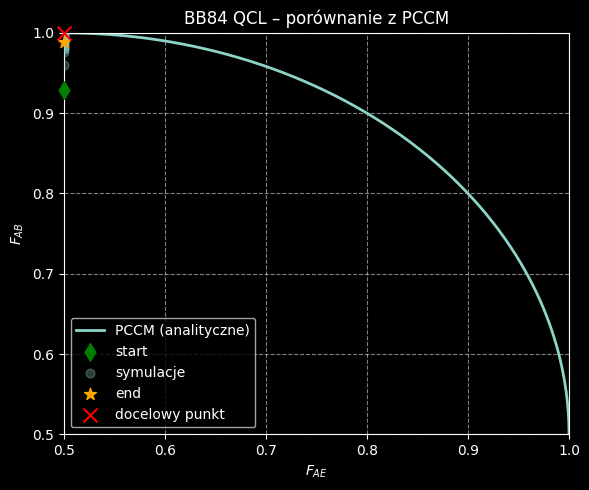

In [5]:
plt_fab_fae(b_q, e_q, 1)

# Krok 2 - trenowanie tylko Eve, warstwy Alice i Boba zamrożone
Uczymy samą Eve, docelowa dokładność Boba to 0.8. Startujemy od parametrów Alice i Boba wytrenowanych w poprzednim kroku i Eve jako identyczność.

In [6]:
eve_protocol.set_parameters(ab_protocol.get_all_parameters())

params = eve_protocol.get_all_parameters()
for p in eve.nu.params():
    k = p.name
    params[k] = 0

eve_protocol.set_parameters(params)
eve_protocol.freeze_elements(layers)
print("Trainable parameters:", eve_protocol.get_unfrozen_parameters())
print("Frozen parameters:", eve_protocol.get_frozen_params())


No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit_machine_learning/connectors/torch_connector.py:378: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self._weights.data = torch.tensor(initial_weights, dtype=torch.float)
No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


Trainable parameters: {'NU_W_0_0_U0[0]': np.float32(0.0), 'NU_W_0_0_U0[1]': np.float32(0.0), 'NU_W_0_0_U0[2]': np.float32(0.0), 'NU_W_0_0_U1[0]': np.float32(0.0), 'NU_W_0_0_U1[1]': np.float32(0.0), 'NU_W_0_0_U1[2]': np.float32(0.0), 'NU_W_0_0_weyl[0]': np.float32(0.0), 'NU_W_0_0_weyl[1]': np.float32(0.0), 'NU_W_0_0_weyl[2]': np.float32(0.0), 'NU_W_0_1_U0[0]': np.float32(0.0), 'NU_W_0_1_U0[1]': np.float32(0.0), 'NU_W_0_1_U0[2]': np.float32(0.0), 'NU_W_0_1_U1[0]': np.float32(0.0), 'NU_W_0_1_U1[1]': np.float32(0.0), 'NU_W_0_1_U1[2]': np.float32(0.0), 'NU_W_0_1_weyl[0]': np.float32(0.0), 'NU_W_0_1_weyl[1]': np.float32(0.0), 'NU_W_0_1_weyl[2]': np.float32(0.0), 'NU_W_1_0_U0[0]': np.float32(0.0), 'NU_W_1_0_U0[1]': np.float32(0.0), 'NU_W_1_0_U0[2]': np.float32(0.0), 'NU_W_1_0_U1[0]': np.float32(0.0), 'NU_W_1_0_U1[1]': np.float32(0.0), 'NU_W_1_0_U1[2]': np.float32(0.0), 'NU_W_1_0_weyl[0]': np.float32(0.0), 'NU_W_1_0_weyl[1]': np.float32(0.0), 'NU_W_1_0_weyl[2]': np.float32(0.0), 'NU_W_2_0_U0[0

In [7]:
eve_protocol.f_value = 0.8
eve_protocol.loss = eve_protocol.loss11
b_q, e_q = train_eve()

start QBER: {'bob_qber': np.float64(0.007352941176470562), 'eve_qber': np.float64(0.4963235294117647)}
epoch: 0, loss: -0.5716449022293091, QBER: {'bob_qber': np.float64(0.07352941176470584), 'eve_qber': np.float64(0.49264705882352944)}
epoch: 5, loss: -0.6038437485694885, QBER: {'bob_qber': np.float64(0.011029411764705843), 'eve_qber': np.float64(0.42647058823529416)}
epoch: 10, loss: -0.9351760745048523, QBER: {'bob_qber': np.float64(0.15808823529411764), 'eve_qber': np.float64(0.22058823529411764)}
epoch: 15, loss: -0.9891627430915833, QBER: {'bob_qber': np.float64(0.23161764705882348), 'eve_qber': np.float64(0.14338235294117652)}
epoch: 20, loss: -1.0101535320281982, QBER: {'bob_qber': np.float64(0.17647058823529416), 'eve_qber': np.float64(0.16911764705882348)}
epoch: 25, loss: -1.033930778503418, QBER: {'bob_qber': np.float64(0.14338235294117652), 'eve_qber': np.float64(0.19117647058823528)}
epoch: 30, loss: -1.0321085453033447, QBER: {'bob_qber': np.float64(0.18382352941176472),

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

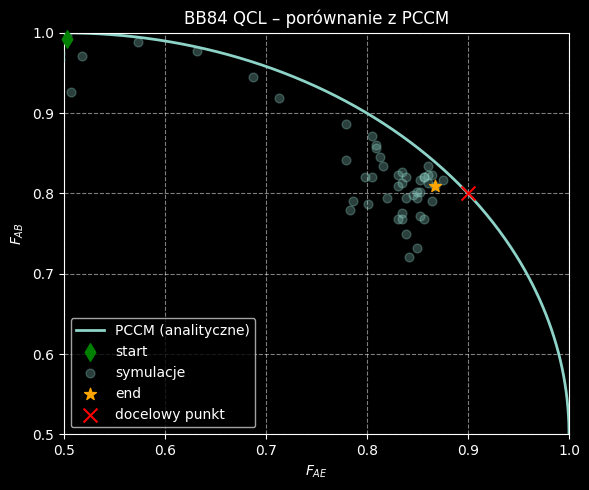

In [8]:
plt_fab_fae(b_q, e_q, 0.8)

# Krok 3 - trenowanie warstw Alice i Boba, Eve zamrożona
Próbujemy uczyć Alice i Boba z użyciem nowej funkcji straty, która maksymalizuje jedynie dokładność Boba.

In [9]:
eve_protocol.freeze_elements([eve])
print("Trainable parameters:", eve_protocol.get_unfrozen_parameters())
print("Frozen parameters:", eve_protocol.get_frozen_params())

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


Trainable parameters: {'AliceLayer_NU_W_U0[0]': np.float32(-0.410192), 'AliceLayer_NU_W_U0[1]': np.float32(-0.11077283), 'AliceLayer_NU_W_U0[2]': np.float32(-0.08412978), 'AliceLayer_NU_W_U1[0]': np.float32(-0.017274689), 'AliceLayer_NU_W_U1[1]': np.float32(-0.583001), 'AliceLayer_NU_W_U1[2]': np.float32(0.4685068), 'AliceLayer_NU_W_weyl[0]': np.float32(-0.100483365), 'AliceLayer_NU_W_weyl[1]': np.float32(0.16959295), 'AliceLayer_NU_W_weyl[2]': np.float32(0.53712773), 'BobLayer_NU_W_U0[0]': np.float32(0.5206609), 'BobLayer_NU_W_U0[1]': np.float32(-0.3937066), 'BobLayer_NU_W_U0[2]': np.float32(0.1805914), 'BobLayer_NU_W_U1[0]': np.float32(-1.2823465), 'BobLayer_NU_W_U1[1]': np.float32(-0.48516354), 'BobLayer_NU_W_U1[2]': np.float32(0.5167777), 'BobLayer_NU_W_weyl[0]': np.float32(0.29566944), 'BobLayer_NU_W_weyl[1]': np.float32(-0.09779221), 'BobLayer_NU_W_weyl[2]': np.float32(-0.06684759)}
Frozen parameters: {'NU_W_0_0_U0[0]': np.float32(-0.48095328), 'NU_W_0_0_U0[1]': np.float32(-0.161

/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit_machine_learning/connectors/torch_connector.py:378: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self._weights.data = torch.tensor(initial_weights, dtype=torch.float)


In [10]:
eve_loss = eve_protocol.loss
eve_protocol.loss = ab_protocol.loss
b_q, e_q = train_eve()

start QBER: {'bob_qber': np.float64(0.19117647058823528), 'eve_qber': np.float64(0.13235294117647056)}
epoch: 0, loss: -0.8061026334762573, QBER: {'bob_qber': np.float64(0.20588235294117652), 'eve_qber': np.float64(0.15441176470588236)}
epoch: 5, loss: -0.8347064256668091, QBER: {'bob_qber': np.float64(0.15808823529411764), 'eve_qber': np.float64(0.22058823529411764)}
epoch: 10, loss: -0.9039711952209473, QBER: {'bob_qber': np.float64(0.08088235294117652), 'eve_qber': np.float64(0.3088235294117647)}
epoch: 15, loss: -0.9498477578163147, QBER: {'bob_qber': np.float64(0.047794117647058876), 'eve_qber': np.float64(0.4963235294117647)}
epoch: 20, loss: -0.9606302380561829, QBER: {'bob_qber': np.float64(0.011029411764705843), 'eve_qber': np.float64(0.5698529411764706)}
epoch: 25, loss: -0.9772047400474548, QBER: {'bob_qber': np.float64(0.018382352941176516), 'eve_qber': np.float64(0.5551470588235294)}
epoch: 30, loss: -0.984296441078186, QBER: {'bob_qber': np.float64(0.014705882352941124), 

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

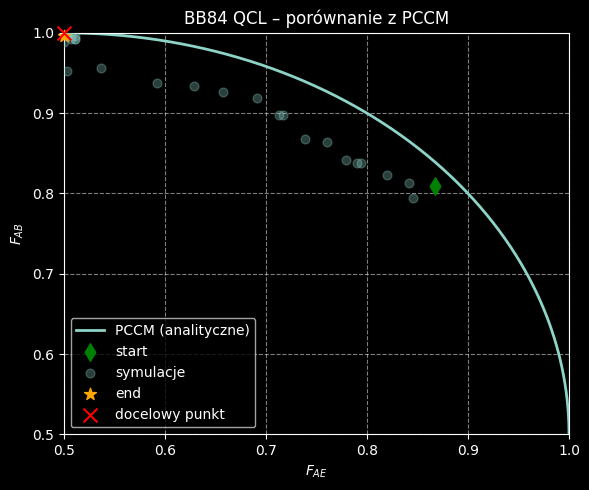

In [11]:
plt_fab_fae(b_q, e_q, 1)

In [12]:
eve_protocol.freeze_elements(layers)
print("Trainable parameters:", eve_protocol.get_unfrozen_parameters())
print("Frozen parameters:", eve_protocol.get_frozen_params())

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


Trainable parameters: {'NU_W_0_0_U0[0]': np.float32(-0.48095328), 'NU_W_0_0_U0[1]': np.float32(-0.1616587), 'NU_W_0_0_U0[2]': np.float32(-0.12265714), 'NU_W_0_0_U1[0]': np.float32(0.26983905), 'NU_W_0_0_U1[1]': np.float32(1.0435108), 'NU_W_0_0_U1[2]': np.float32(0.8115077), 'NU_W_0_0_weyl[0]': np.float32(-0.89250773), 'NU_W_0_0_weyl[1]': np.float32(0.27459058), 'NU_W_0_0_weyl[2]': np.float32(-0.12662229), 'NU_W_0_1_U0[0]': np.float32(0.04161212), 'NU_W_0_1_U0[1]': np.float32(-0.024285698), 'NU_W_0_1_U0[2]': np.float32(2.8073703e-08), 'NU_W_0_1_U1[0]': np.float32(-0.7579465), 'NU_W_0_1_U1[1]': np.float32(-0.70014), 'NU_W_0_1_U1[2]': np.float32(1.0074541e-09), 'NU_W_0_1_weyl[0]': np.float32(0.04418322), 'NU_W_0_1_weyl[1]': np.float32(0.034683455), 'NU_W_0_1_weyl[2]': np.float32(-0.030883567), 'NU_W_1_0_U0[0]': np.float32(-0.32694796), 'NU_W_1_0_U0[1]': np.float32(0.07659145), 'NU_W_1_0_U0[2]': np.float32(0.010382282), 'NU_W_1_0_U1[0]': np.float32(0.22250046), 'NU_W_1_0_U1[1]': np.float32

/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit_machine_learning/connectors/torch_connector.py:378: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self._weights.data = torch.tensor(initial_weights, dtype=torch.float)


In [13]:
eve_protocol.f_value = 0.8
eve_protocol.loss = eve_protocol.loss11
b_q, e_q = train_eve()

start QBER: {'bob_qber': np.float64(0.003676470588235281), 'eve_qber': np.float64(0.5220588235294117)}
epoch: 0, loss: -0.5812548398971558, QBER: {'bob_qber': np.float64(0.047794117647058876), 'eve_qber': np.float64(0.4338235294117647)}
epoch: 5, loss: -0.9203542470932007, QBER: {'bob_qber': np.float64(0.2683823529411765), 'eve_qber': np.float64(0.1875)}
epoch: 10, loss: -0.9690340161323547, QBER: {'bob_qber': np.float64(0.19485294117647056), 'eve_qber': np.float64(0.11029411764705888)}
epoch: 15, loss: -1.0910143852233887, QBER: {'bob_qber': np.float64(0.19852941176470584), 'eve_qber': np.float64(0.1470588235294118)}
epoch: 20, loss: -1.0969080924987793, QBER: {'bob_qber': np.float64(0.21691176470588236), 'eve_qber': np.float64(0.13235294117647056)}
epoch: 25, loss: -1.1132216453552246, QBER: {'bob_qber': np.float64(0.1470588235294118), 'eve_qber': np.float64(0.12132352941176472)}
epoch: 30, loss: -1.1549434661865234, QBER: {'bob_qber': np.float64(0.1470588235294118), 'eve_qber': np.f

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

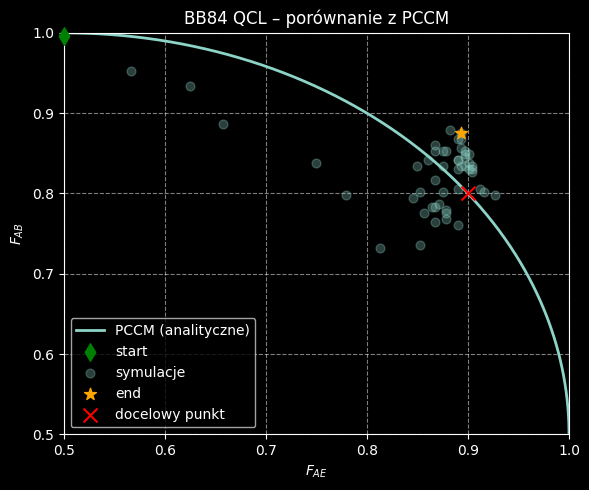

In [14]:
plt_fab_fae(b_q, e_q, 0.8)

In [15]:
eve_protocol.freeze_elements([eve])
print("Trainable parameters:", eve_protocol.get_unfrozen_parameters())
print("Frozen parameters:", eve_protocol.get_frozen_params())

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


Trainable parameters: {'AliceLayer_NU_W_U0[0]': np.float32(0.17268959), 'AliceLayer_NU_W_U0[1]': np.float32(0.17378744), 'AliceLayer_NU_W_U0[2]': np.float32(-1.0679104), 'AliceLayer_NU_W_U1[0]': np.float32(1.5683815), 'AliceLayer_NU_W_U1[1]': np.float32(-1.176196), 'AliceLayer_NU_W_U1[2]': np.float32(0.4685068), 'AliceLayer_NU_W_weyl[0]': np.float32(-1.1745272), 'AliceLayer_NU_W_weyl[1]': np.float32(-0.69284064), 'AliceLayer_NU_W_weyl[2]': np.float32(-0.0010103458), 'BobLayer_NU_W_U0[0]': np.float32(1.4685913), 'BobLayer_NU_W_U0[1]': np.float32(-0.7881586), 'BobLayer_NU_W_U0[2]': np.float32(1.8845454), 'BobLayer_NU_W_U1[0]': np.float32(0.023321686), 'BobLayer_NU_W_U1[1]': np.float32(-0.2423781), 'BobLayer_NU_W_U1[2]': np.float32(-0.24885505), 'BobLayer_NU_W_weyl[0]': np.float32(0.759951), 'BobLayer_NU_W_weyl[1]': np.float32(-0.58756685), 'BobLayer_NU_W_weyl[2]': np.float32(-0.059901394)}
Frozen parameters: {'NU_W_0_0_U0[0]': np.float32(-0.73731214), 'NU_W_0_0_U0[1]': np.float32(-0.5253

/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit_machine_learning/connectors/torch_connector.py:378: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self._weights.data = torch.tensor(initial_weights, dtype=torch.float)


In [16]:
eve_protocol.loss = ab_protocol.loss
b_q, e_q = train_eve()

start QBER: {'bob_qber': np.float64(0.125), 'eve_qber': np.float64(0.10661764705882348)}
epoch: 0, loss: -0.802194356918335, QBER: {'bob_qber': np.float64(0.13970588235294112), 'eve_qber': np.float64(0.12132352941176472)}
epoch: 5, loss: -0.8719592094421387, QBER: {'bob_qber': np.float64(0.125), 'eve_qber': np.float64(0.21323529411764708)}
epoch: 10, loss: -0.9292683601379395, QBER: {'bob_qber': np.float64(0.05882352941176472), 'eve_qber': np.float64(0.3933823529411765)}
epoch: 15, loss: -0.9413491487503052, QBER: {'bob_qber': np.float64(0.047794117647058876), 'eve_qber': np.float64(0.46691176470588236)}
epoch: 20, loss: -0.9549551010131836, QBER: {'bob_qber': np.float64(0.0404411764705882), 'eve_qber': np.float64(0.4963235294117647)}
epoch: 25, loss: -0.963677167892456, QBER: {'bob_qber': np.float64(0.05882352941176472), 'eve_qber': np.float64(0.5257352941176471)}
epoch: 30, loss: -0.956317126750946, QBER: {'bob_qber': np.float64(0.05514705882352944), 'eve_qber': np.float64(0.52941176

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

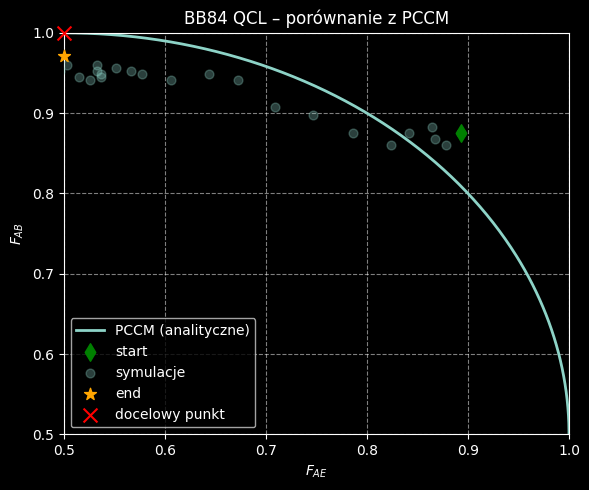

In [17]:
plt_fab_fae(b_q, e_q, 1)

In [18]:
print("All parameters:", eve_protocol.get_all_parameters())

All parameters: {'NU_W_0_0_U0[0]': np.float32(-0.73731214), 'NU_W_0_0_U0[1]': np.float32(-0.5253962), 'NU_W_0_0_U0[2]': np.float32(-0.6431427), 'NU_W_0_0_U1[0]': np.float32(-0.19669698), 'NU_W_0_0_U1[1]': np.float32(1.148273), 'NU_W_0_0_U1[2]': np.float32(0.5877953), 'NU_W_0_0_weyl[0]': np.float32(-1.320302), 'NU_W_0_0_weyl[1]': np.float32(0.029938435), 'NU_W_0_0_weyl[2]': np.float32(-0.67813414), 'NU_W_0_1_U0[0]': np.float32(0.13254635), 'NU_W_0_1_U0[1]': np.float32(0.3736337), 'NU_W_0_1_U0[2]': np.float32(3.82623e-08), 'NU_W_0_1_U1[0]': np.float32(0.025052862), 'NU_W_0_1_U1[1]': np.float32(-1.147454), 'NU_W_0_1_U1[2]': np.float32(1.0074541e-09), 'NU_W_0_1_weyl[0]': np.float32(0.20526198), 'NU_W_0_1_weyl[1]': np.float32(0.21607798), 'NU_W_0_1_weyl[2]': np.float32(-0.25885049), 'NU_W_1_0_U0[0]': np.float32(-0.6557288), 'NU_W_1_0_U0[1]': np.float32(-0.13384289), 'NU_W_1_0_U0[2]': np.float32(0.029604938), 'NU_W_1_0_U1[0]': np.float32(0.6270674), 'NU_W_1_0_U1[1]': np.float32(0.4156071), '

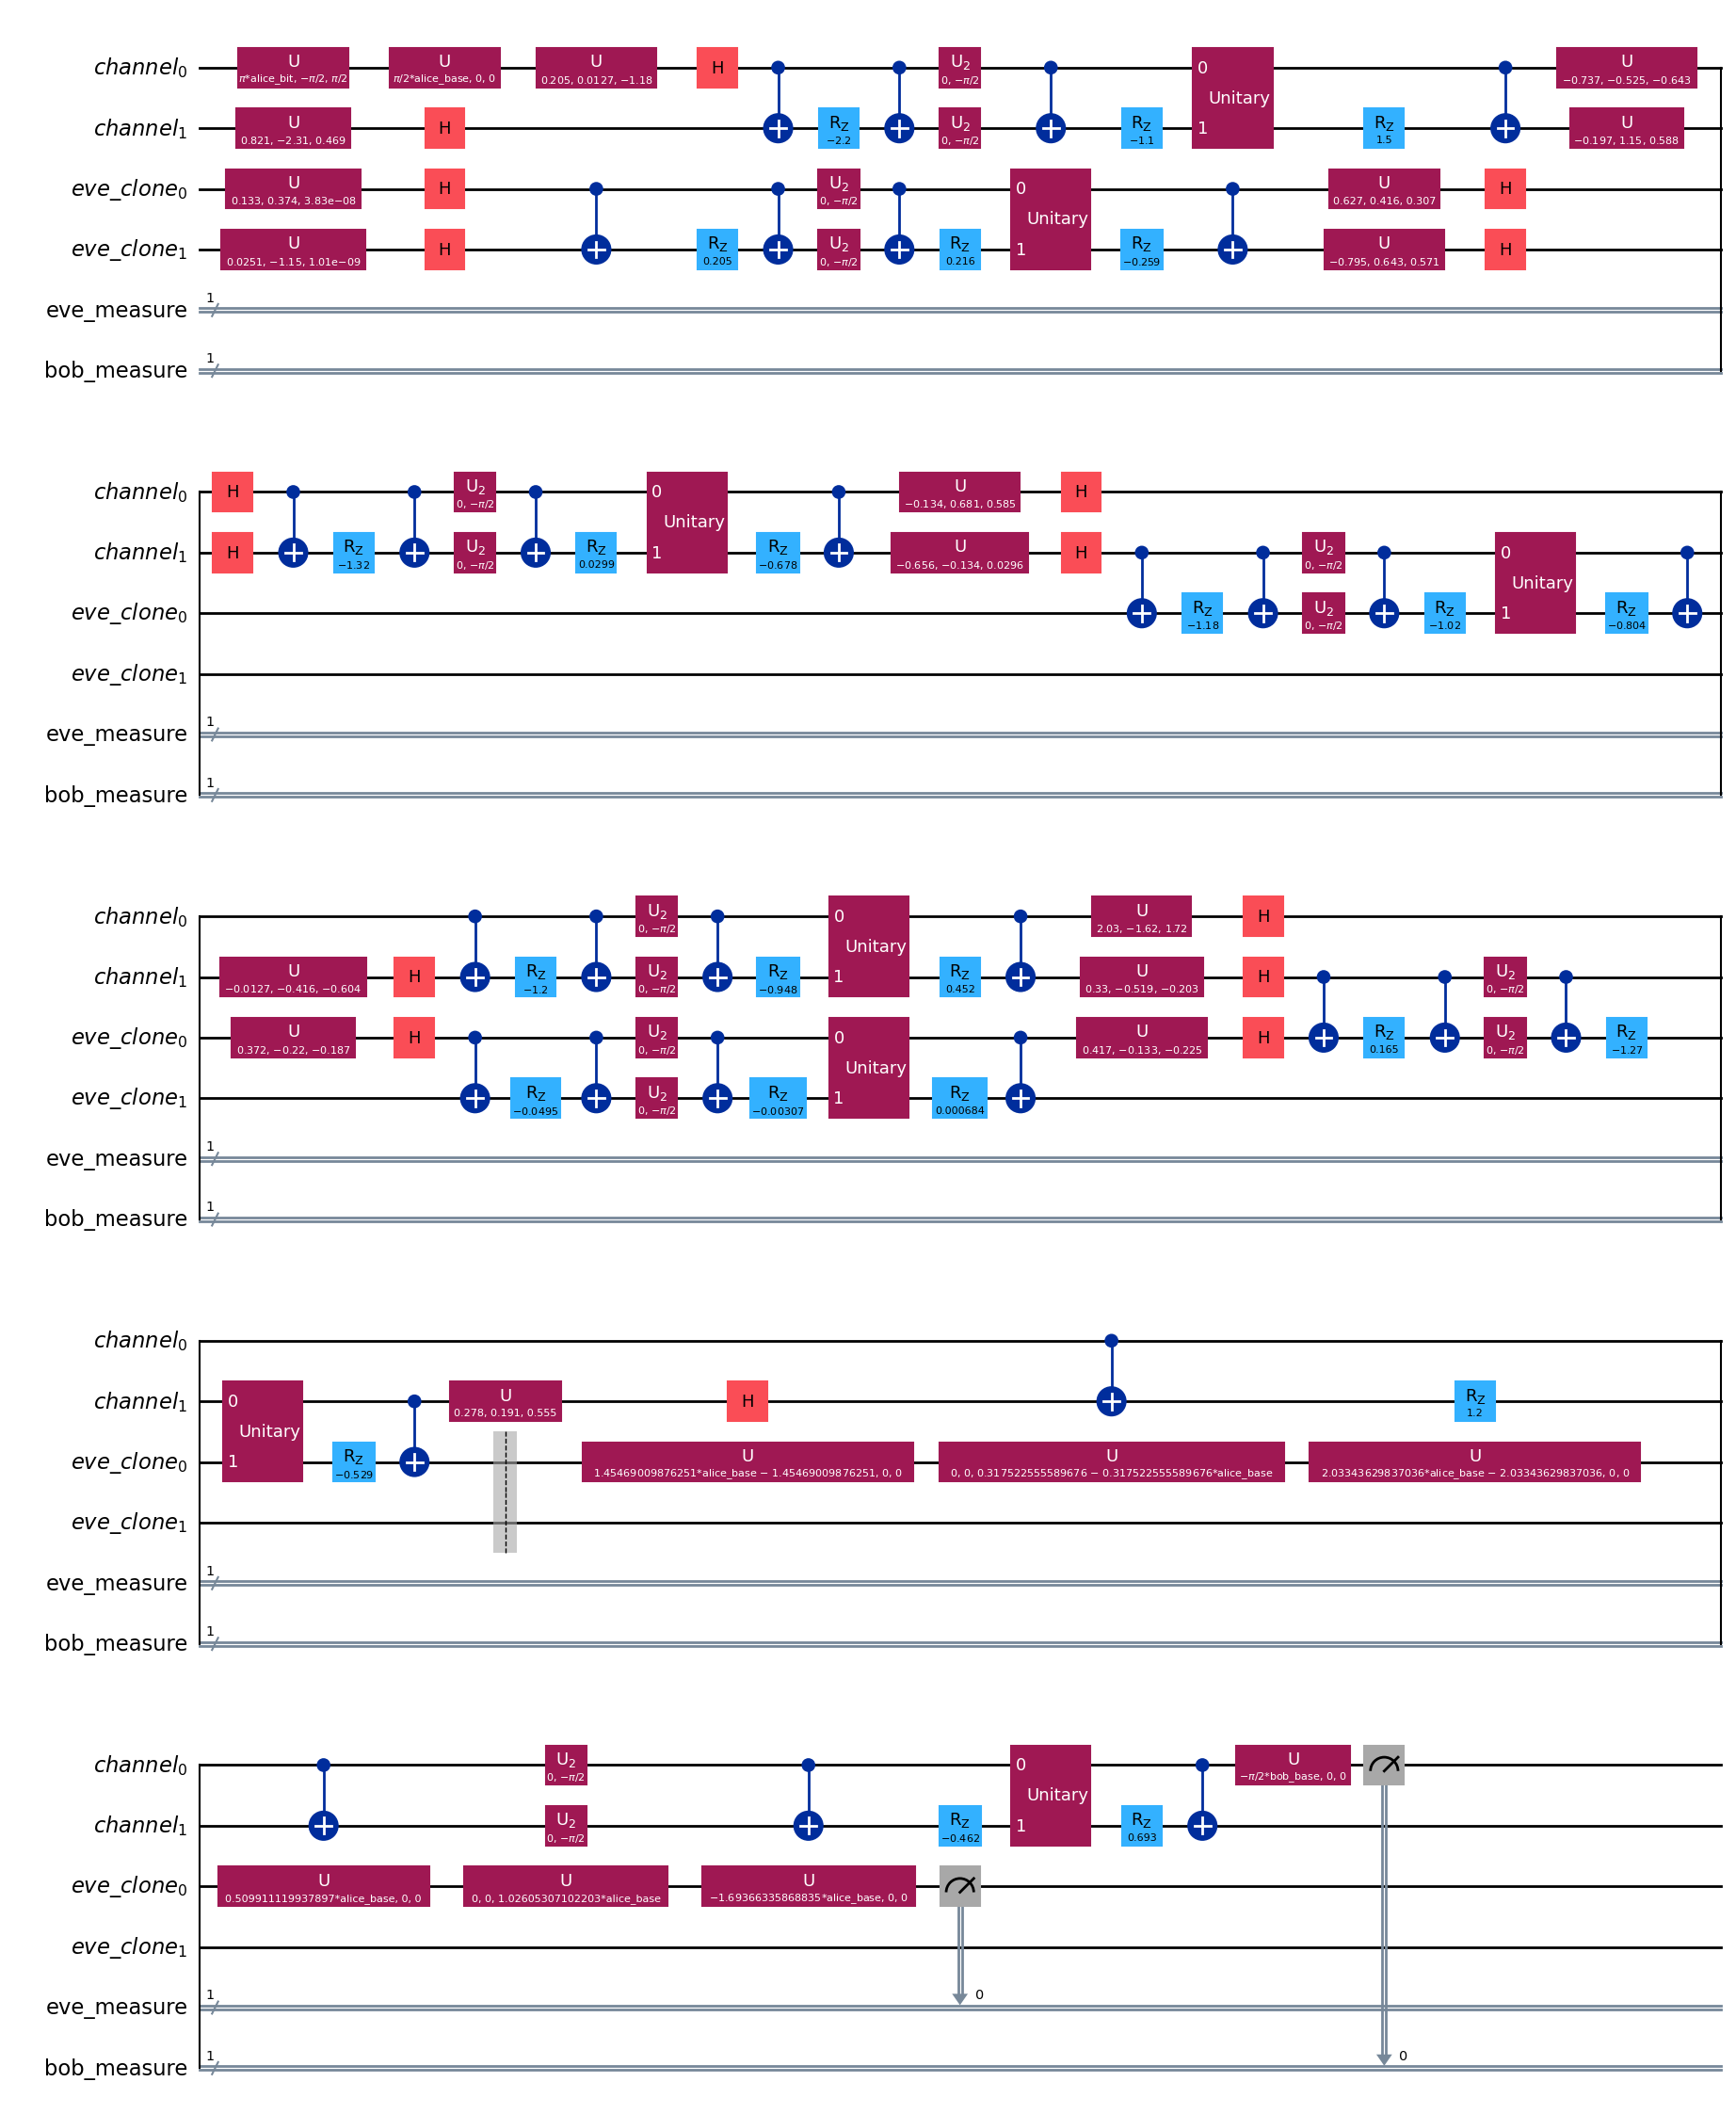

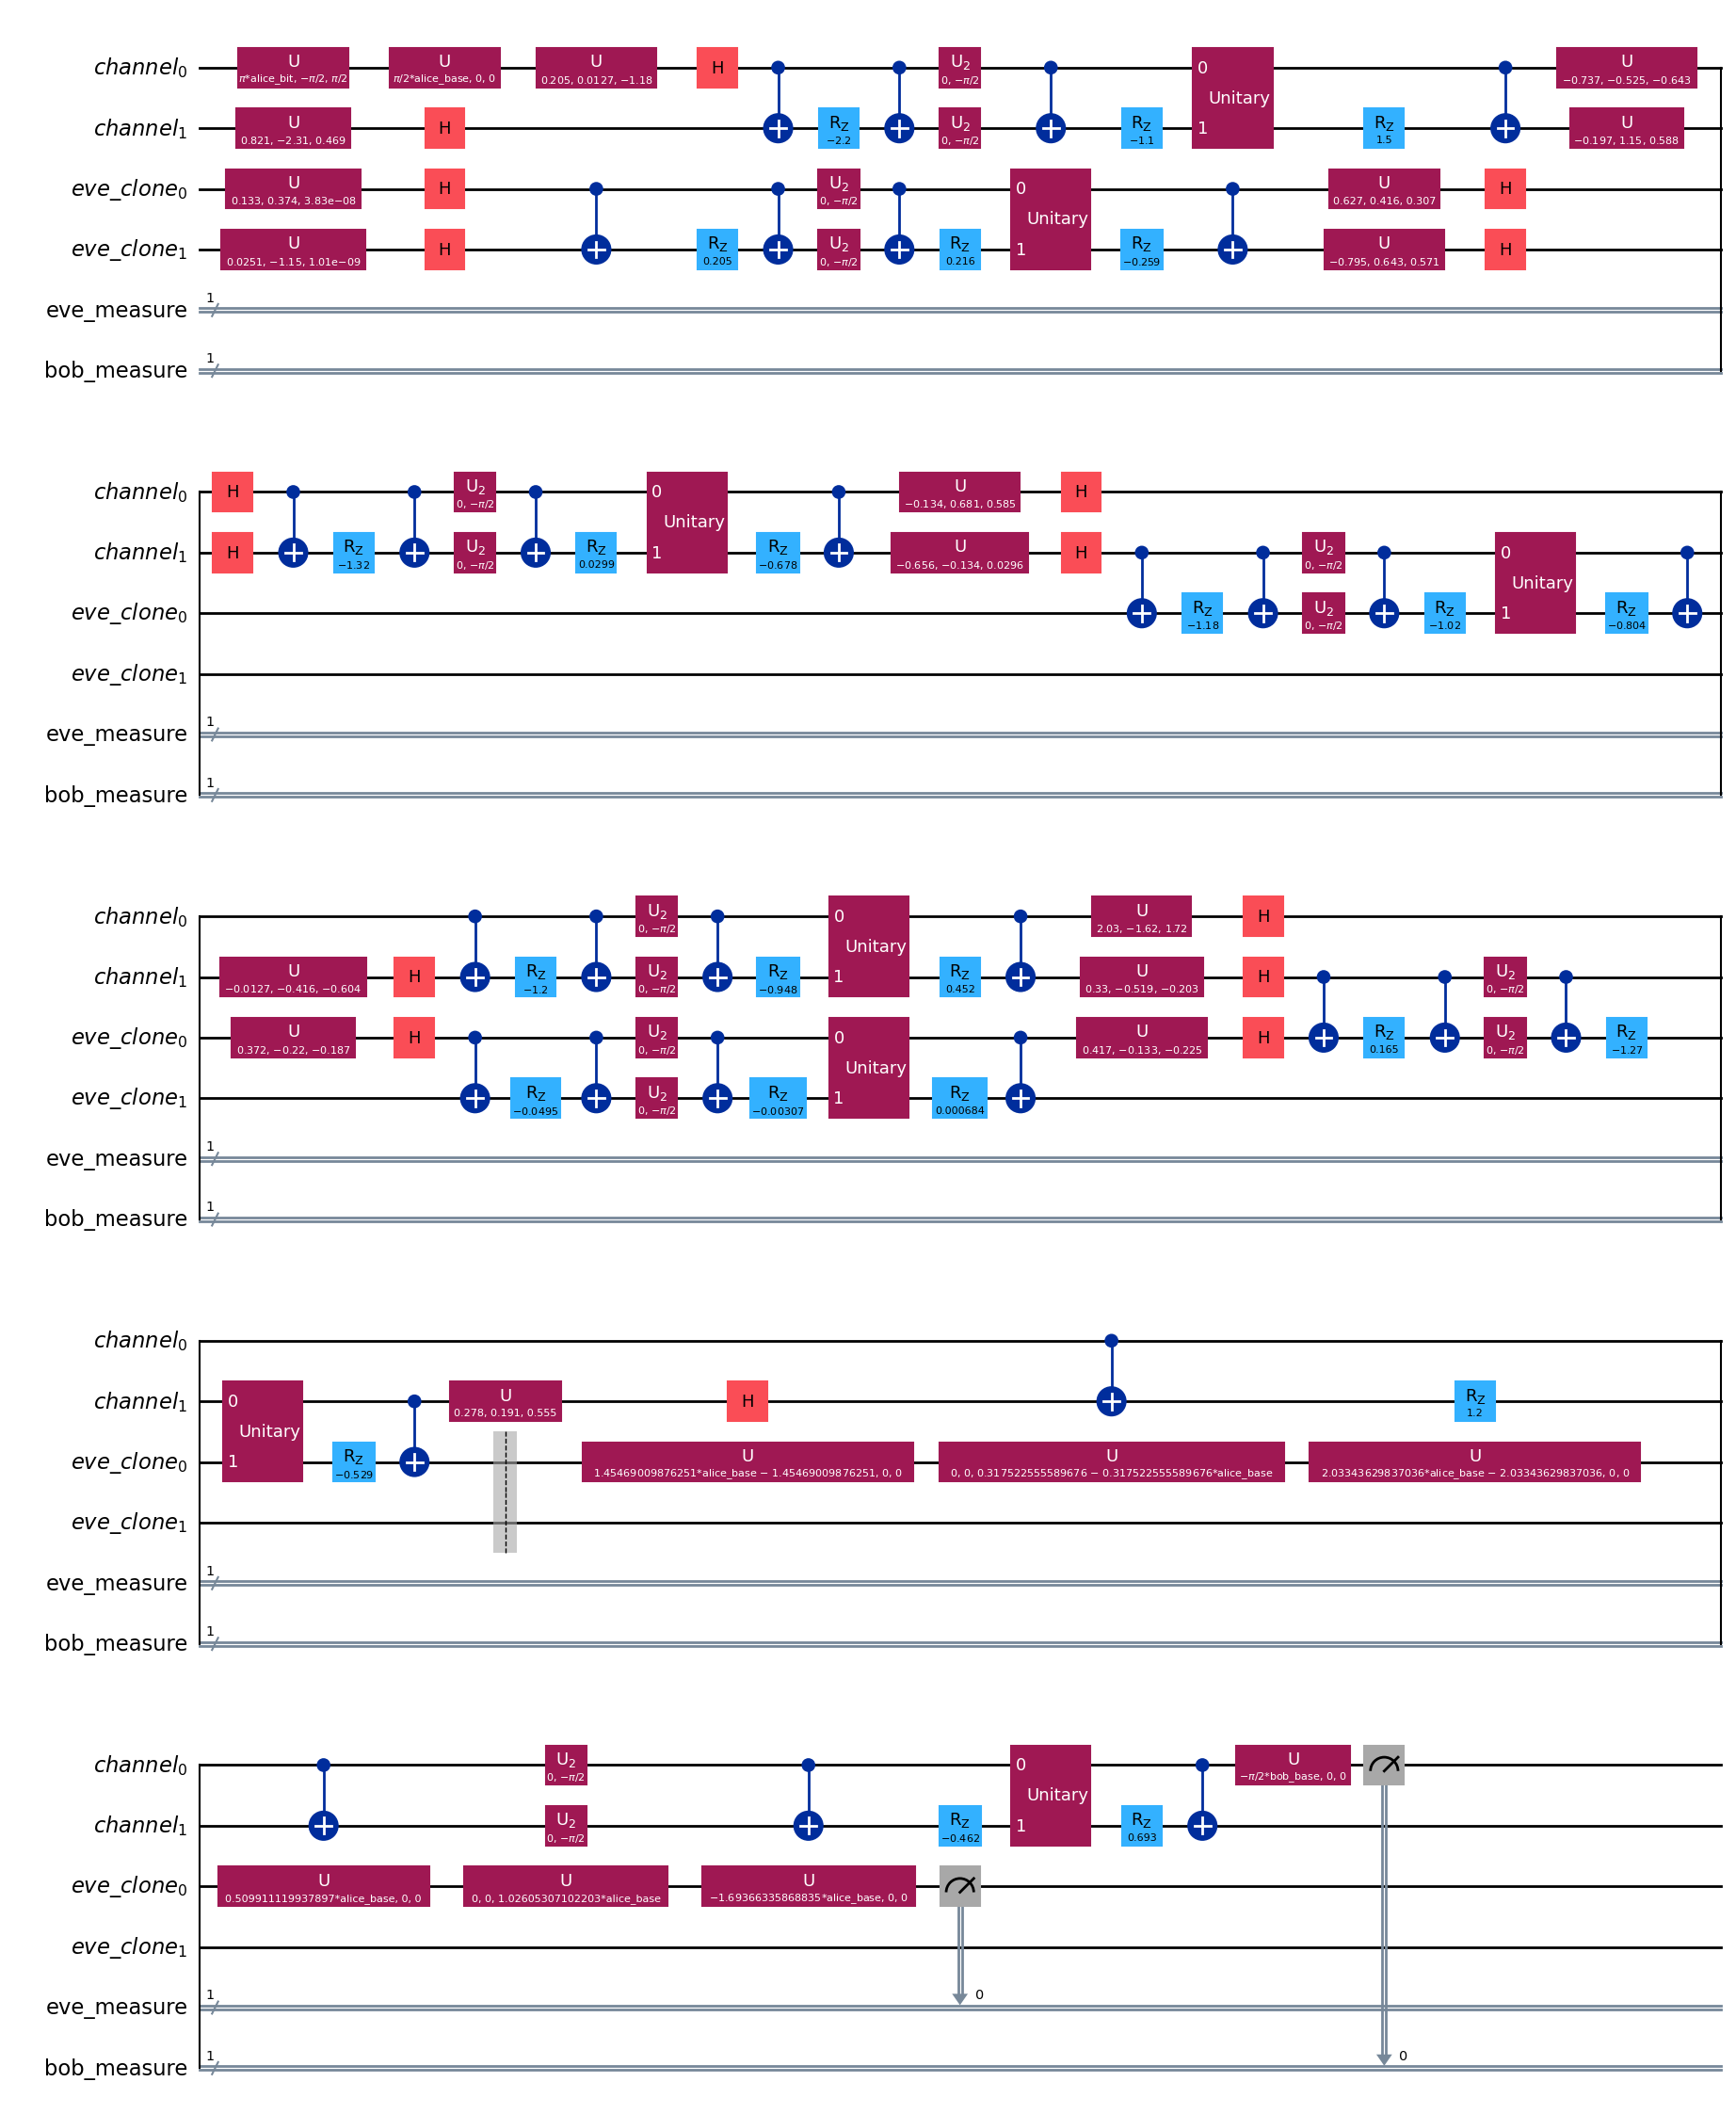

In [19]:
eve_protocol._qc.assign_parameters(eve_protocol.get_all_parameters()).draw("mpl")